Copyright (c) 2019 [Sebastian Raschka](sebastianraschka.com)

https://github.com/rasbt/python-machine-learning-book-3rd-edition

[MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt)

# Python. Uczenie maszynowe - kod źródłowy

# Rozdział 2. Trenowanie prostych algorytmów uczenia maszynowego w celach klasyfikacji

Zwróć uwagę, że rozszerzenie zawierające nieobowiązkowy znak wodny stanowi niewielki plugin notatnika IPython / Jupyter, który zaprojektowałem w celu powielania kodu źródłowego. Wystarczy pominąć poniższe wiersze kodu:

In [1]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib

Sebastian Raschka 
last updated: 2019-12-04 

numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.0


*Korzystanie z rozszerzenia `watermark` nie jest obowiązkowe. Możesz je zainstalować za pomocą polecenia:*  

    conda install watermark -c conda-forge  

lub  

    pip install watermark   

*Więcej informacji znajdziesz pod adresem: https://github.com/rasbt/watermark.*

### Spis treści


- [Sztuczne neurony — rys historyczny początków uczenia maszynowego](#Sztuczne-neurony-—-rys-historyczny-początków-uczenia-maszynowego)
    - [Formalna definicja sztucznego neuronu](#Formalna-definicja-sztucznego-neuronu)
    - [Reguła uczenia perceptronu](#Reguła-uczenia-perceptronu)
- [Implementacja algorytmu uczenia perceptronu w Pythonie](#Implementacja-algorytmu-uczenia-perceptronu-w-Pythonie)
    - [Obiektowy interfejs API perceptronu](#Obiektowy-interfejs-API-perceptronu)
    - [Trenowanie modelu perceptronu na zestawie danych Iris](#Trenowanie-modelu-perceptronu-na-zestawie-danych-Iris)
- [Adaptacyjne neurony liniowe i zbieżność uczenia](#Adaptacyjne-neurony-liniowe-i-zbieżność-uczenia)
    - [Minimalizacja funkcji kosztu za pomocą metody gradientu prostego](#Minimalizacja-funkcji-kosztu-za-pomocą-metody-gradientu-prostego)
    - [Implementacja algorytmu Adaline w Pythonie](#Implementacja-algorytmu-Adaline-w-Pythonie)
    - [Usprawnianie gradientu prostego poprzez skalowanie cech](#Usprawnianie-gradientu-prostego-poprzez-skalowanie-cech)
    - [Wielkoskalowe uczenie maszynowe i metoda stochastycznego spadku wzdłuż gradientu](#Wielkoskalowe-uczenie-maszynowe-i-metoda-stochastycznego-spadku-wzdłuż-gradientu)
- [Podsumowanie](#Podsumowanie)

<br>
<br>

In [1]:
from IPython.display import Image

# Sztuczne neurony — rys historyczny początków uczenia maszynowego

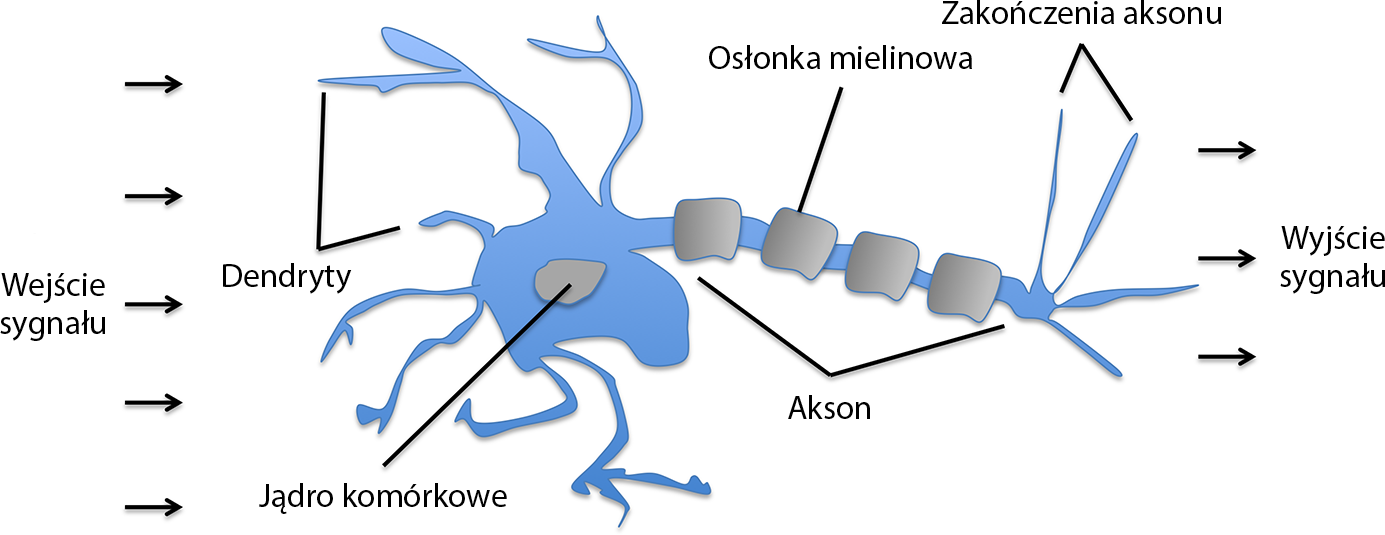

In [2]:
Image(filename='./rysunki/02_01.png', width=500) 

## Formalna definicja sztucznego neuronu

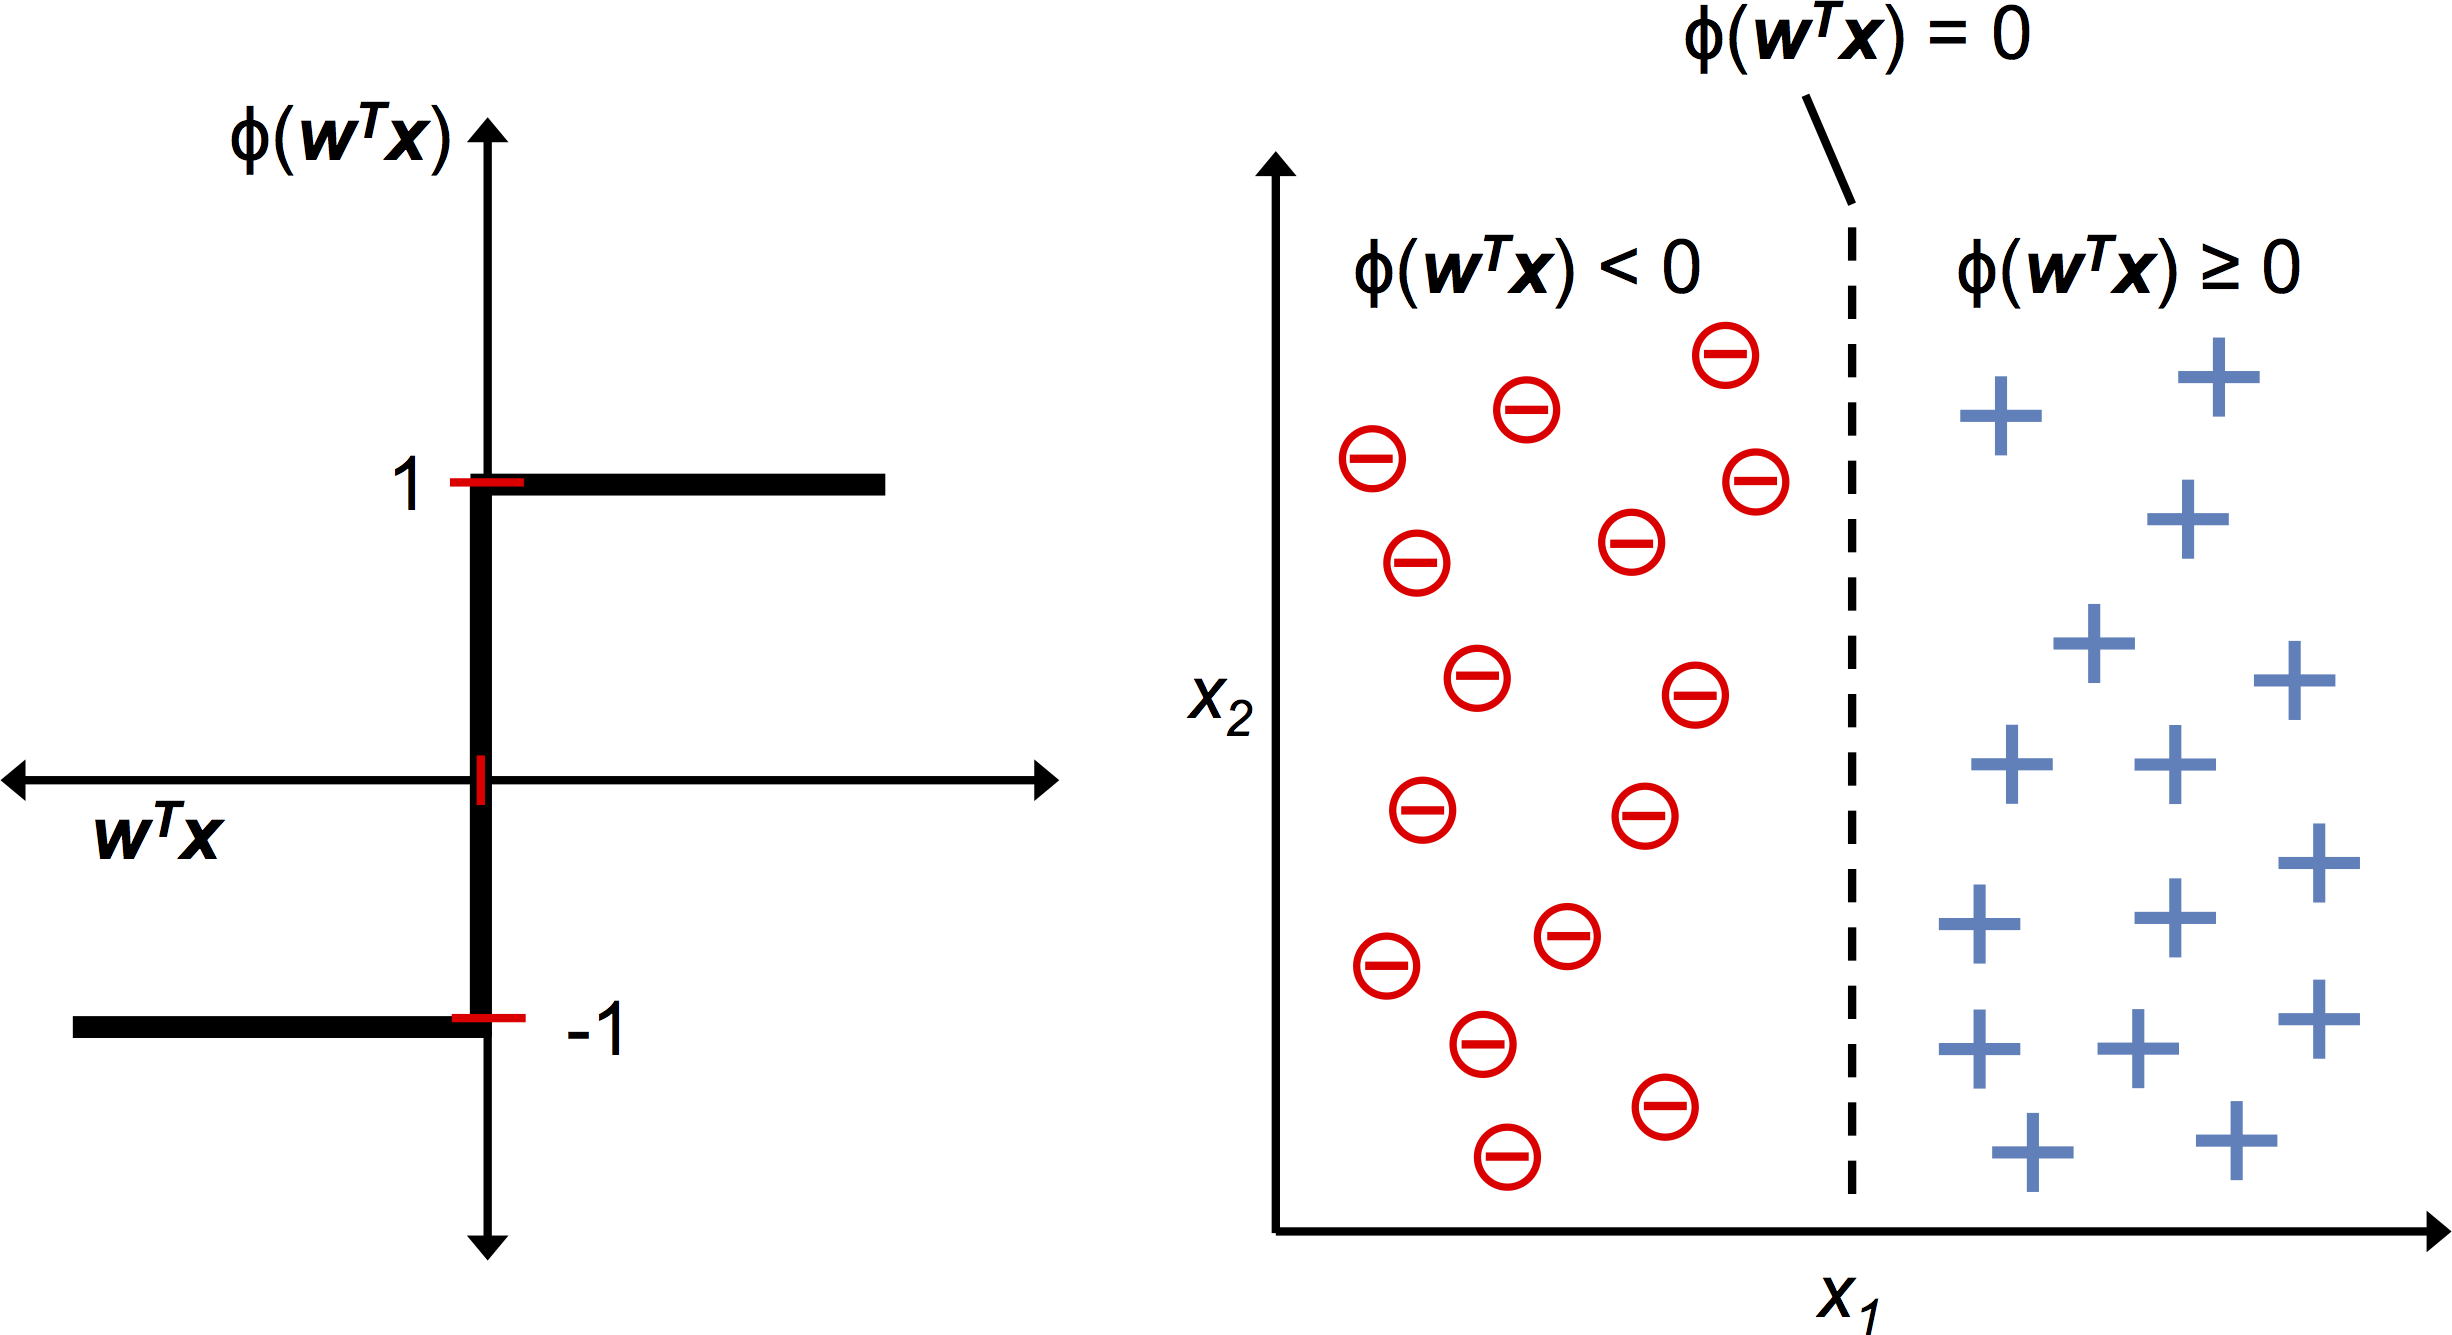

In [3]:
Image(filename='./rysunki/02_02.png', width=500) 

## Reguła uczenia perceptronu

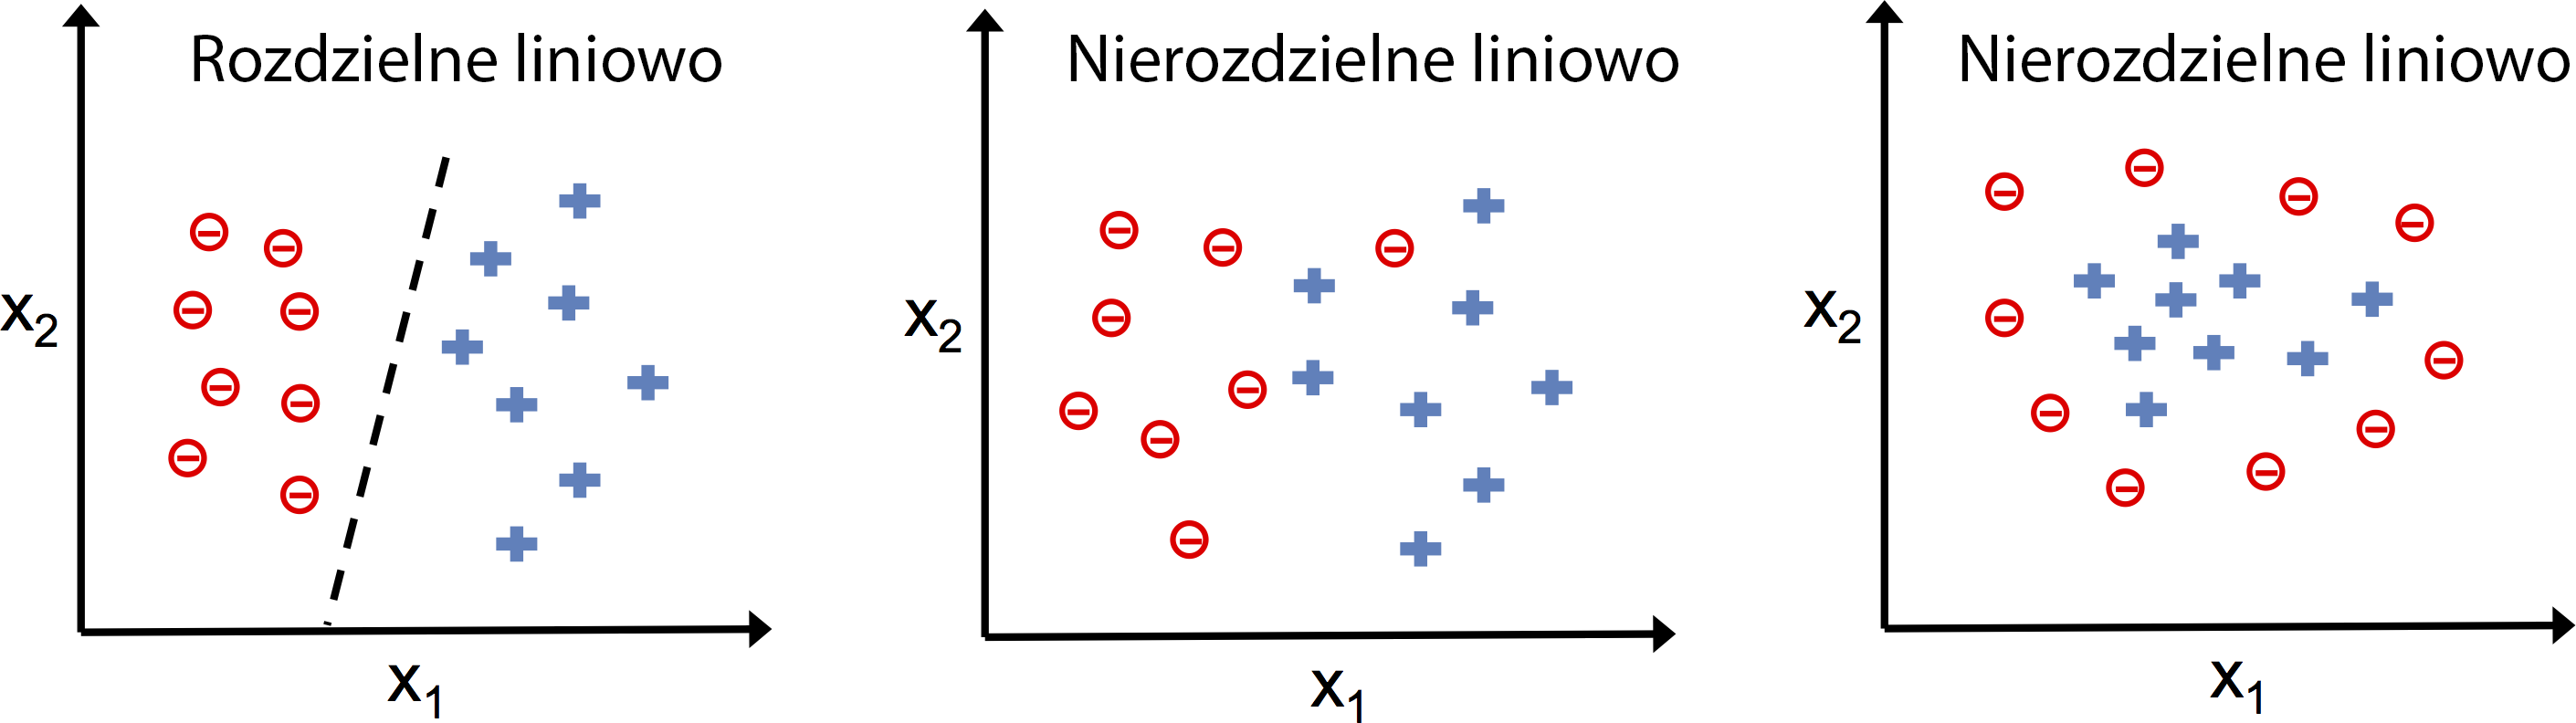

In [4]:
Image(filename='./rysunki/02_03.png', width=600) 

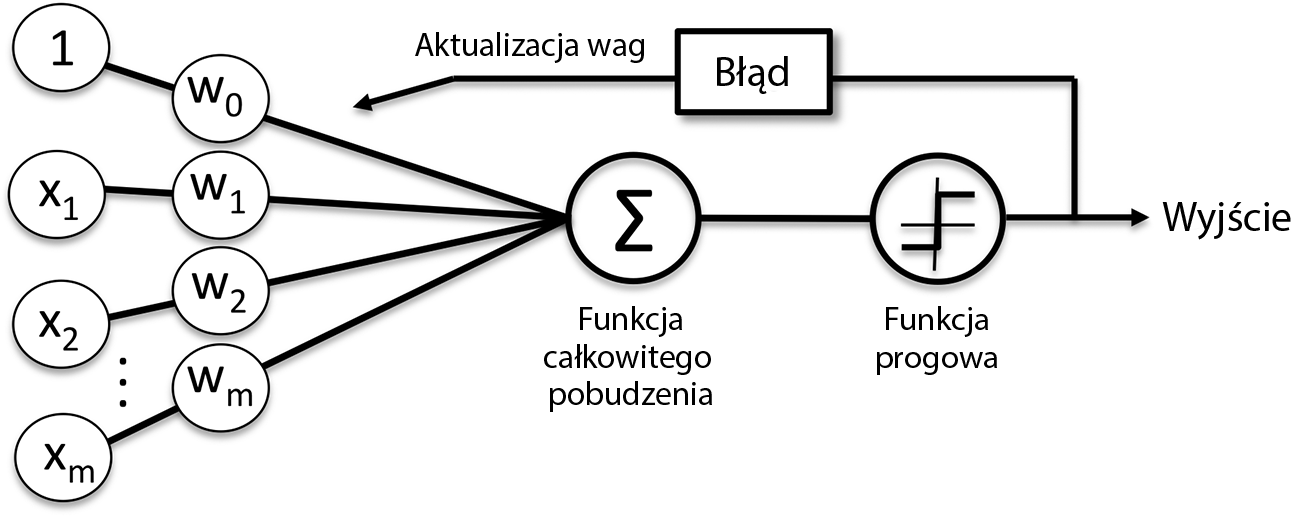

In [5]:
 Image(filename='./rysunki/02_04.png', width=600) 

<br>
<br>

# Implementacja algorytmu uczenia perceptronu w Pythonie

## Obiektowy interfejs API perceptronu

In [7]:
import numpy as np


class Perceptron(object):
    """Klasyfikator - perceptron.
​
    Parametry
    ------------
    eta : zmiennoprzecinkowy
        Współczynnik uczenia (w przedziale pomiędzy 0.0 a 1.0)
    n_iter : liczba całkowita
        Liczba przebiegów po zestawach uczących.
    random_state : liczba całkowita
      Ziarno generatora liczb losowych służące do losowego
      inicjalizowania wag.
​
    Atrybuty
    -----------
    w_ : jednowymiarowa tablica
        Wagi po dopasowaniu.
    errors_ : lista
        Liczba nieprawidłowych klasyfikacji (aktualizacji) w każdej epoce.
​
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Dopasowanie danych uczących.

        Parametry
        ----------
        X : {tablicopodobny}, wymiary = [n_przykładów, n_cech]
            Wektory uczące, gdzie n_przykładów
            oznacza liczbę przykładów, a
            n_cech — liczbę cech.
        y : tablicopodobny, wymiary = [n_przykładów]
            Wartości docelowe.

        Zwraca
        -------
        self : obiekt

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Oblicza pobudzenie całkowite"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Zwraca etykietę klas po obliczeniu funkcji skoku jednostkowego"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [8]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

<br>
<br>

## Trenowanie modelu perceptronu na zestawie danych Iris

...

### Wczytywanie zestawu danych Iris

In [9]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr>

### Uwaga:


Kopię zestawu danych Iris (a także wszystkich pozostałych zestawów danych wykorzystywanych w tej książce) znajdziesz w przykładowym kodzie dołączonym do niniejszej książki, dzięki czemu możesz z niego korzystać będąc odłączonym od internetu lub jeśli serwer UCI https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data jest niedostępny. Na przykład, aby wczytać zestaw danych Iris z katalogu lokalnego, wystarczy zastąpić wiersz 

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
 
wierszem
 
    df = pd.read_csv('Twoja/ścieżka/lokalna/do/zestawu/iris', header=None)


In [10]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr>

<br>
<br>

### Rysowanie wykresu zestawu danych Iris

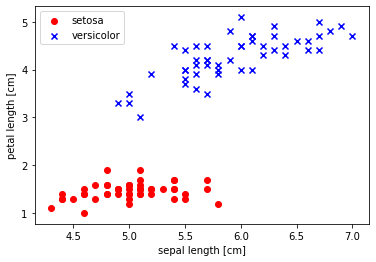

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# wybiera gatunki setosa i versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# wydobywa cechy: długość działki i długość płatka
X = df.iloc[0:100, [0, 2]].values

# rysuje wykres
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')

# plt.savefig('rysunki/02_06.png', dpi=300)
plt.show()

<br>
<br>

### Uczenie modelu perceptronu

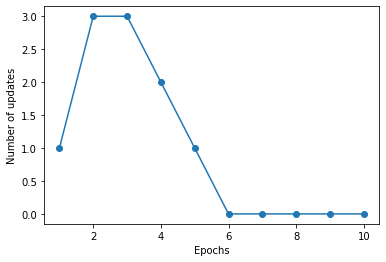

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Liczba aktualizacji')

# plt.savefig('rysunki/02_07.png', dpi=300)
plt.show()

<br>
<br>

### Funkcja rysująca wykres regionów decyzyjnych

In [13]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # konfiguruje generator znaczników i mapę kolorów
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # rysuje wykres powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # rysuje wykres klas przykładów
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

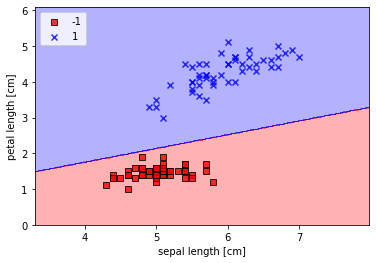

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')


# plt.savefig('rysunki/02_08.png', dpi=300)
plt.show()

<br>
<br>

# Adaptacyjne neurony liniowe i zbieżność uczenia

...

## Minimalizacja funkcji kosztu za pomocą metody gradientu prostego

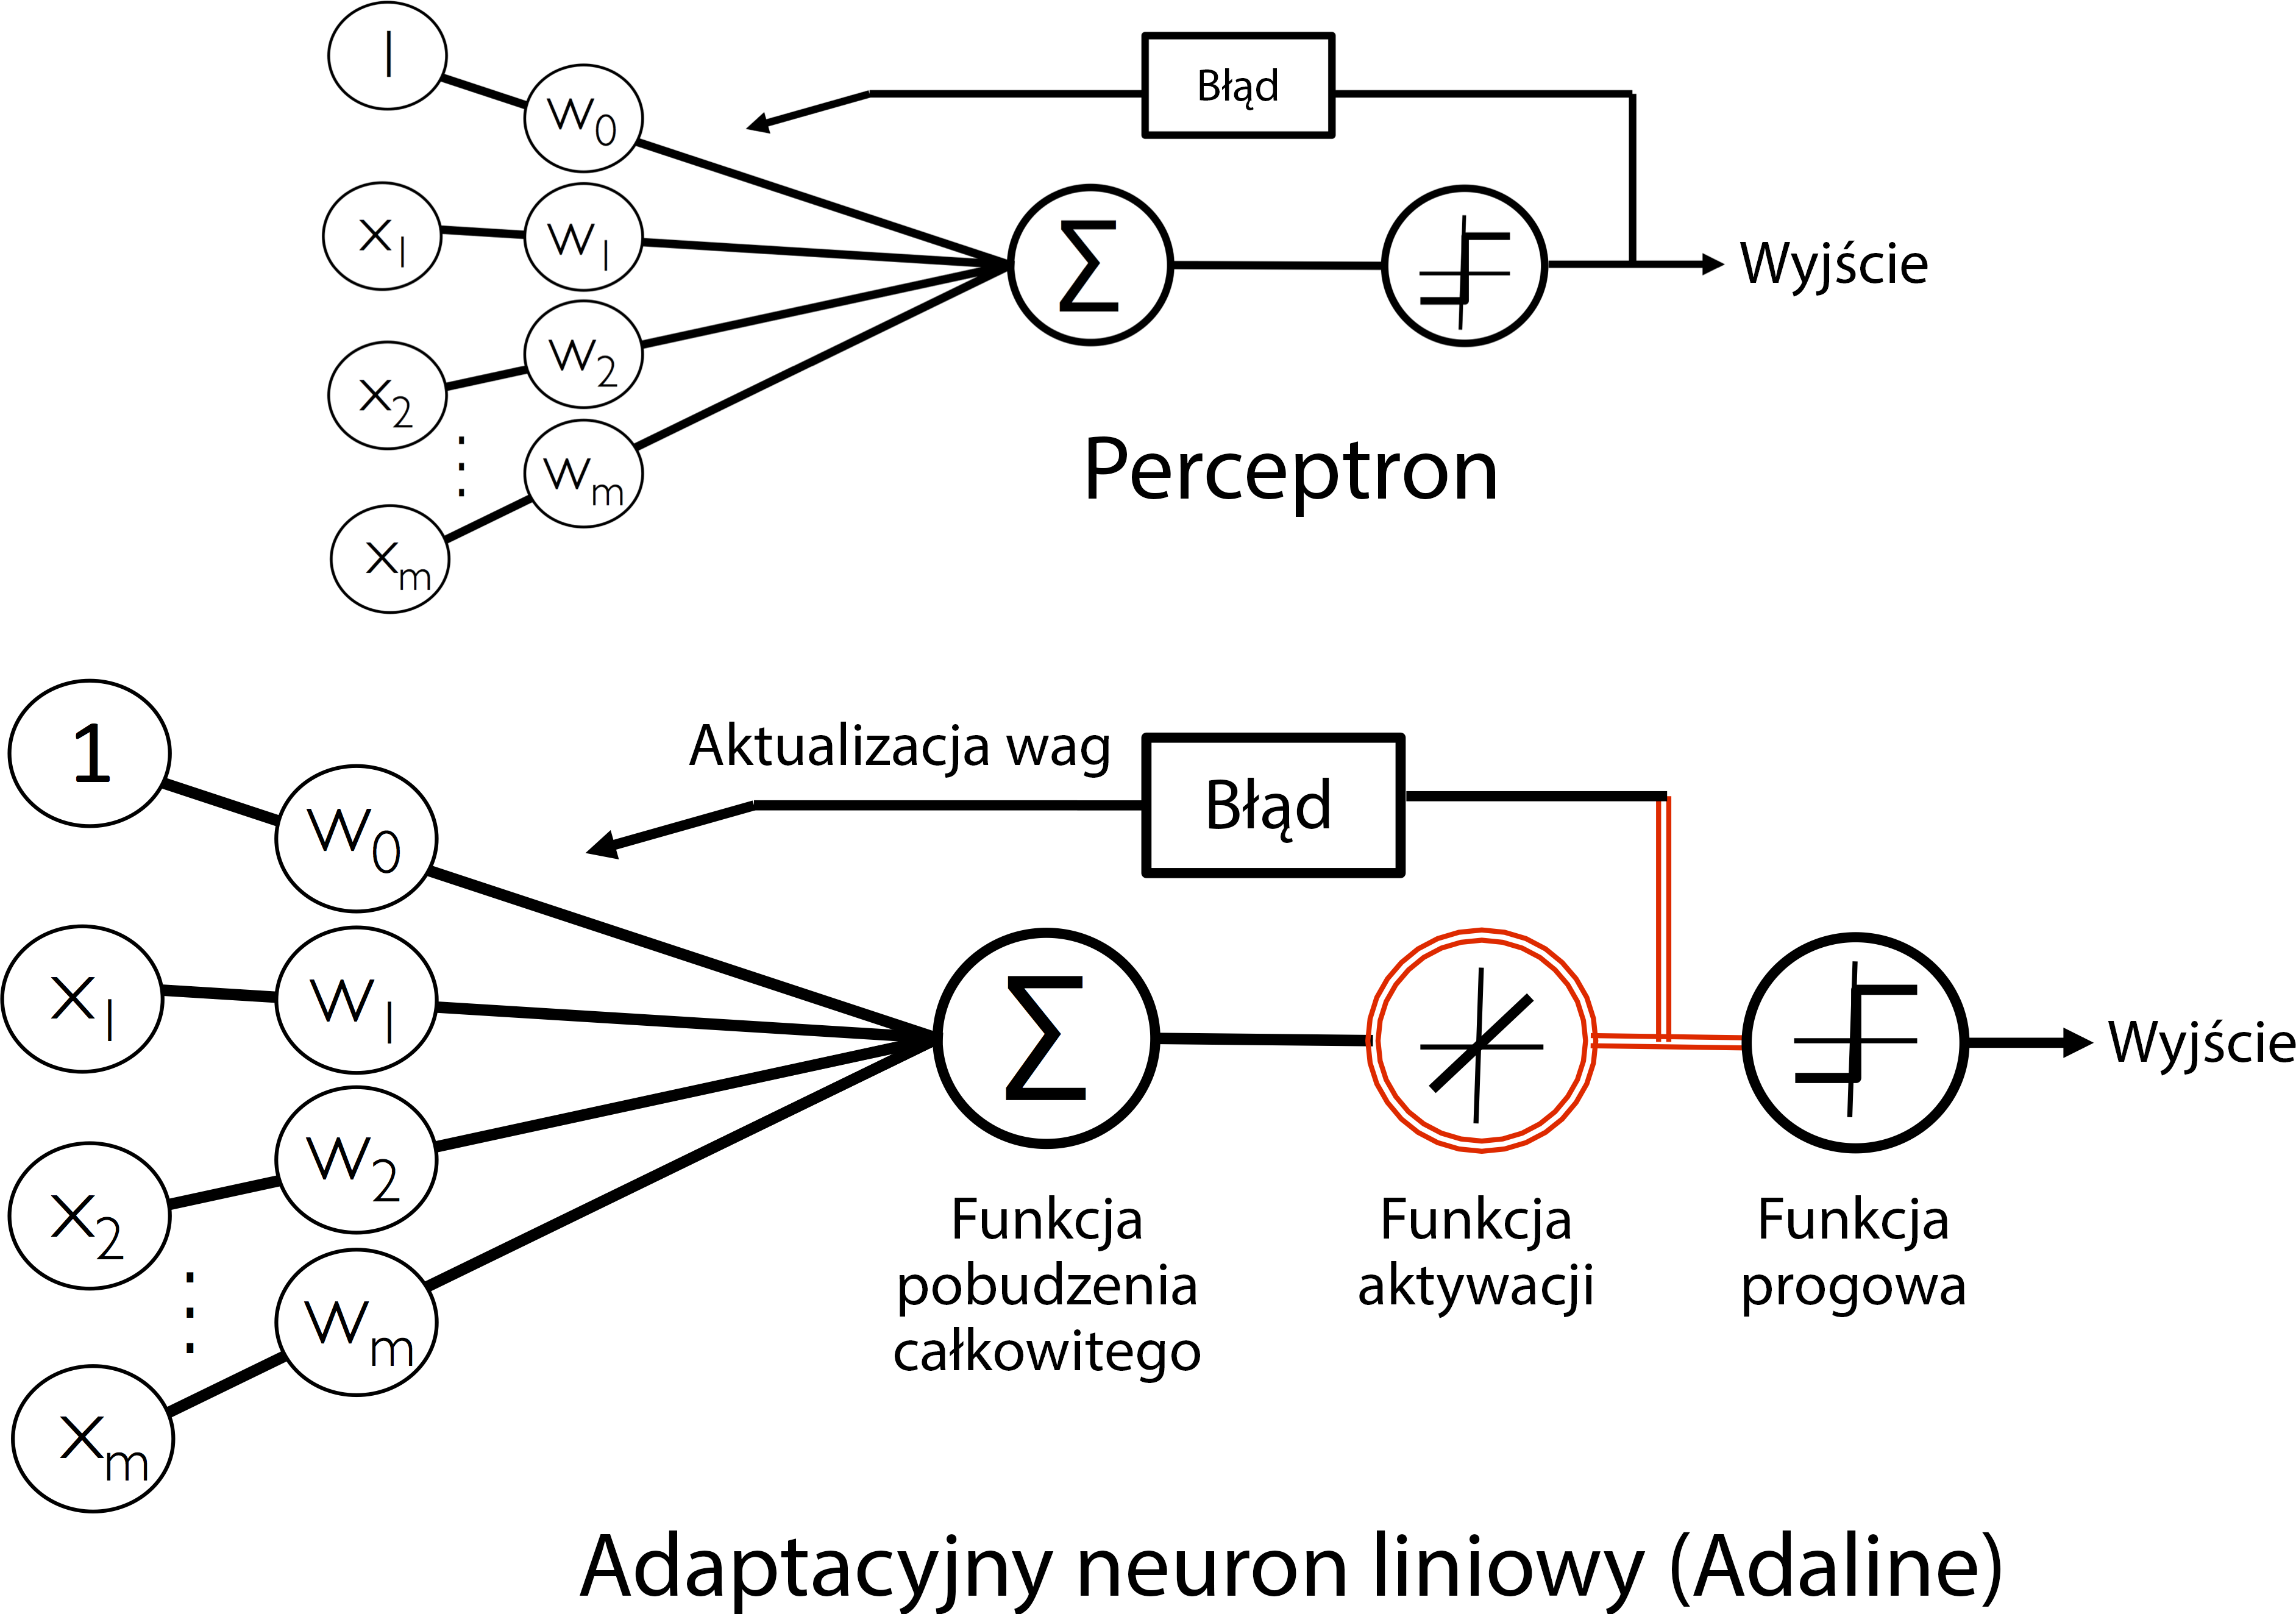

In [6]:
 Image(filename='./rysunki/02_09.png', width=600) 

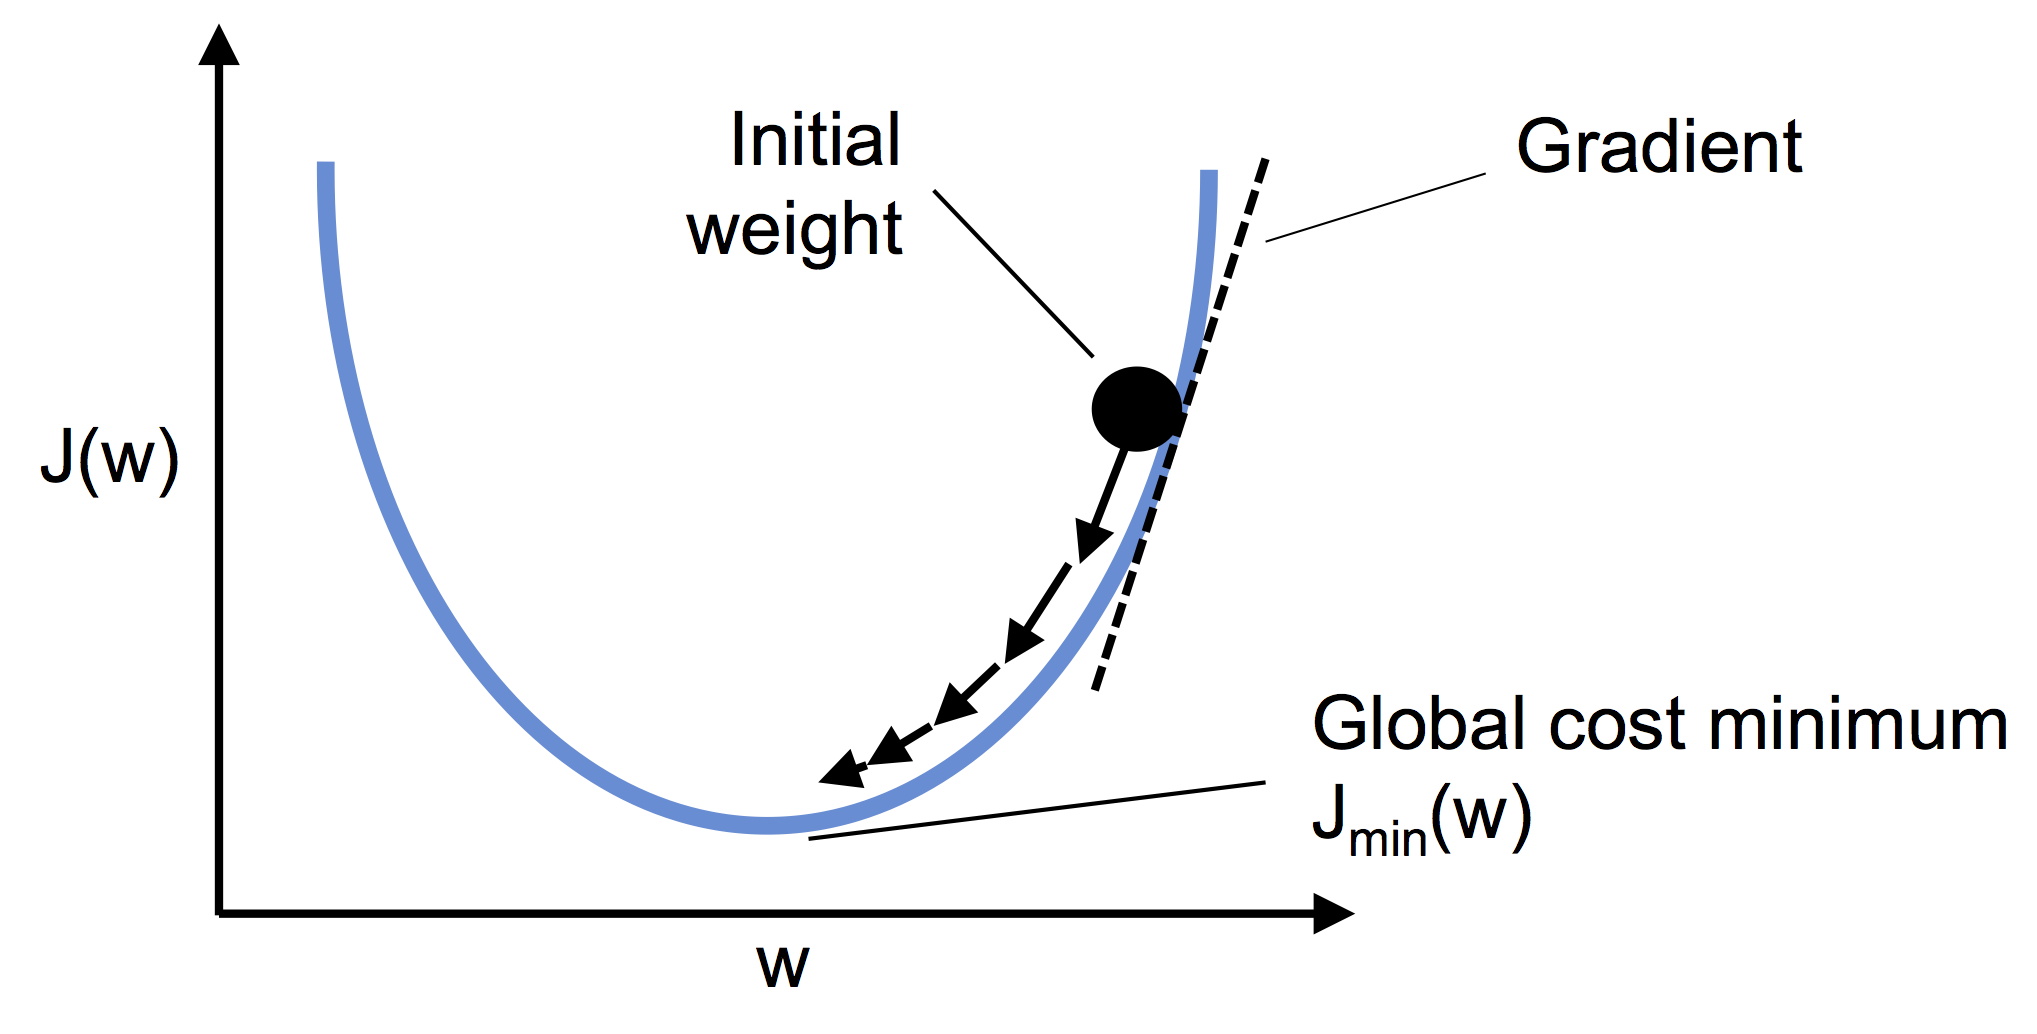

In [16]:
 Image(filename='./rysunki/02_10.png', width=500) 

<br>
<br>

## Implementacja algorytmu Adaline w Pythonie

In [17]:
class AdalineGD(object):
    """Klasyfikator — ADAptacyjny LIniowy NEuron.

    Parametry
    ------------
    eta : zmiennoprzecinkowy
        Współczynnik uczenia (w zakresie pomiędzy 0.0 i 1.0)
    n_iter : liczba całkowita
        Liczba przebiegów po zestawie uczącym.
    random_state : liczba całkowita
      Ziarno generatora liczb losowych służący do losowego
      inicjalizowania wag.


    Atrybuty
    -----------
    w_ : jednowymiarowa tablica
        Wagi po dopasowaniu.
    cost_ : lista
      Suma kwadratów błędów (wartość funkcji kosztu) w każdej epoce.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Trenowanie za pomocą danych uczących.

        Parametry
        ----------
        X : {tablicopodobny}, wymiary = [n_przykładów, n_cech]
            Wektory uczenia,
            gdzie n_przykładów oznacza liczbę przykładów, a
            n_cech – liczbę cech.
        y : tablicopodobny, wymiary = [n_przykładów]
            Wartości docelowe.

        Zwraca
        -------
        self : obiekt

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            net_input = self.net_input(X)
            # Zwróć uwagę, że metoda "activation" nie ma wpływu na działanie kodu,
            # gdyż jest to zwykła funkcja tożsamościowa. Moglibyśmy zamiast tego napisać
            # bezpośrednio po prostu `output = self.net_input(X)`.
            # Zastosowanie tej aktywacji w tym miejscu jest bardziej pojęciowe, np.  
            # podczas korzystania z regresji logistycznej (o czym przekonamy się już wkrótce)
            # możemy zastąpić tę funkcję funkcją sigmoidalną, dzięki czemu
            # uzyskamy klasyfikator bazujący na regresji logistycznej.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """oblicza pobudzenie całkowite"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """oblicza liniową funkcję aktywacji"""
        return X

    def predict(self, X):
        """zwraca etykietę klas po wykonaniu skoku jednostkowego"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

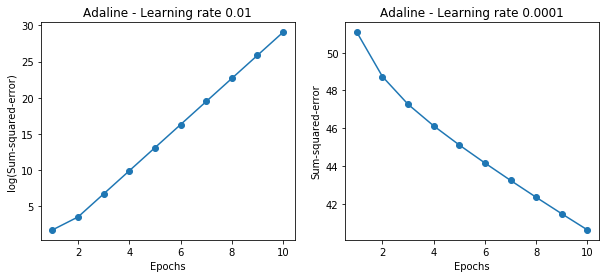

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epoki')
ax[0].set_ylabel('log(suma kwadratów błędów)')
ax[0].set_title('Adaline - współczynnik uczenia 0,01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epoki')
ax[1].set_ylabel('Suma kwadratów błędów')
ax[1].set_title('Adaline - współczynnik uczenia 0,0001')

# plt.savefig('rysunki/02_11.png', dpi=300)
plt.show()

<br>
<br>

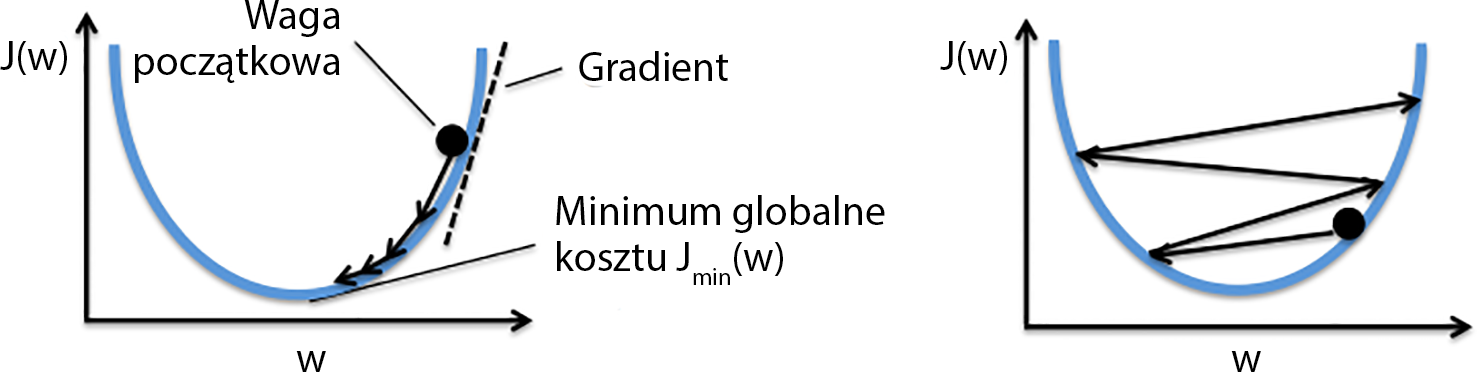

In [7]:
Image(filename='./rysunki/02_12.png', width=700) 

<br>
<br>

## Usprawnianie gradientu prostego poprzez skalowanie cech

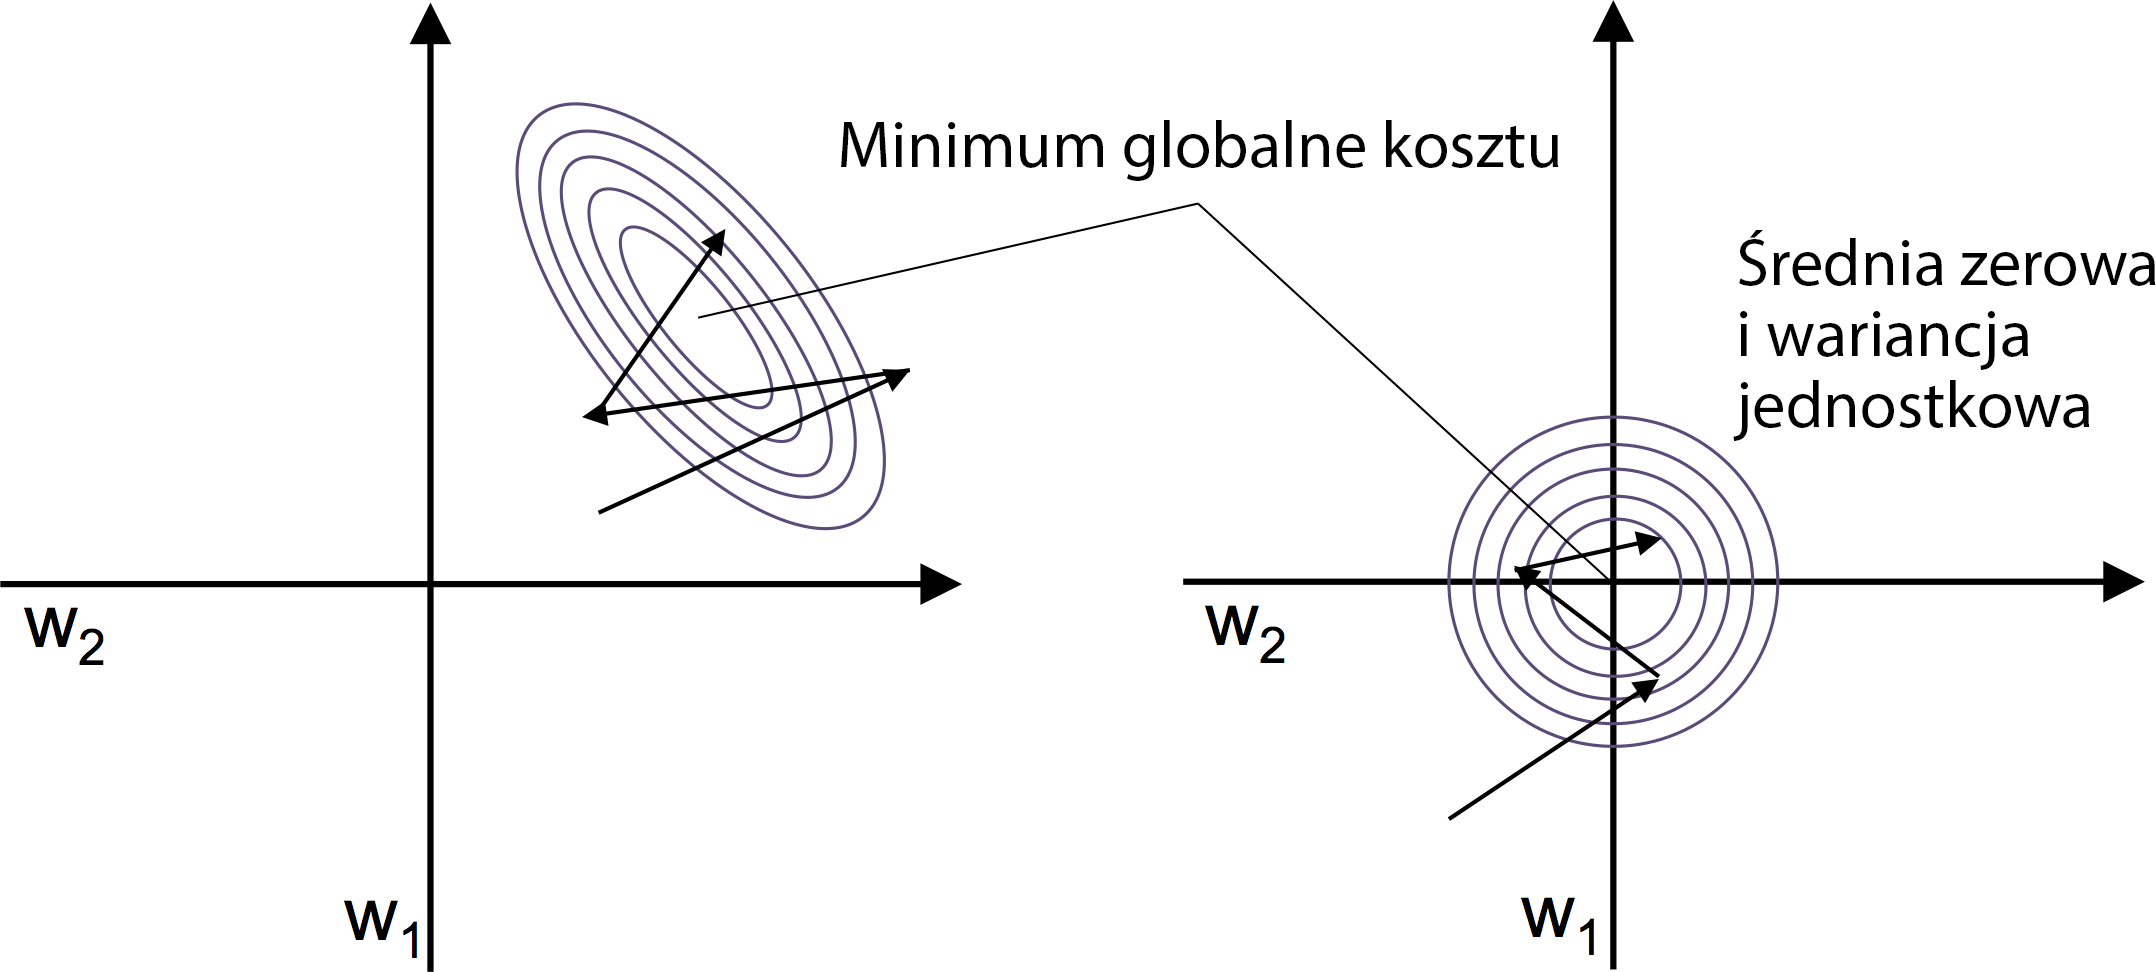

In [8]:
Image(filename='./rysunki/02_13.png', width=700) 

In [21]:
# standaryzuje cechy
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

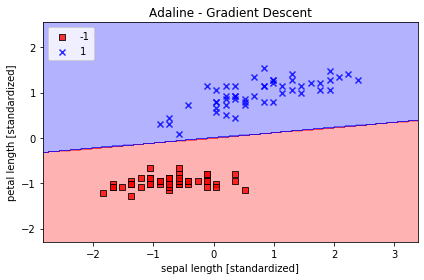

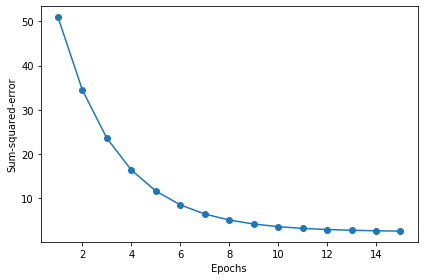

In [22]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - gradient prosty')
plt.xlabel('Długość działki [standaryzowana]')
plt.ylabel('Długość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('rysunki/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Suma kwadratów błędów')

plt.tight_layout()
# plt.savefig('rysunki/02_14_2.png', dpi=300)
plt.show()

<br>
<br>

## Wielkoskalowe uczenie maszynowe i metoda stochastycznego spadku wzdłuż gradientu

In [23]:
class AdalineSGD(object):
    """Klasyfikator — ADAptacyjny LIniowy NEuron.

    Parametry
    ------------
    eta : zmiennoprzecinkowy
        Współczynnik uczenia (w zakresie pomiędzy 0.0 i 1.0)
    n_iter : liczba całkowita
        Liczba przebiegów po zestawie uczącym.
    shuffle : wartość boolowska (domyślnie: True)
        Jeżeli jest ustalona wartość True,
        tasuje dane uczące przed każdą epoką w celu zapobiegnięcia cykliczności.
    random_state : liczba całkowita
      Ziarno generatora liczb losowych służący do losowego
      inicjalizowania wag.


    Atrybuty
    -----------
    w_ : jednowymiarowa tablica
        Wagi po dopasowaniu.
    cost_ : lista
      Suma kwadratów błędów (funkcja kosztu) uśredniona
      wobec wszystkich przykładów uczących w każdej epoce.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Dopasowanie danych uczących.

        Parametry
        ----------
        X : {tablicopodobny}, wymiary = [n_przykładów, n_cech]
            Wektory uczące, gdzie n_przykładów
            oznacza liczbę przykładów, a
            n_cech określa liczbę cech.
        y : tablicopodobny, wymiary = [n_przykładów]
            Wartości docelowe.

        Zwraca
        -------
        self : obiekt

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """dopasowuje dane uczące bez ponownej inicjalizacji wag"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """tasuje dane uczące"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """inicjalizuje wagi z bardzo małymi wartościami"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """wykorzystuje regułę uczenia Adaline do aktualizacji wag"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """oblicza pobudzenie całkowite"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """oblicza liniową funkcję aktywacji"""
        return X

    def predict(self, X):
        """zwraca etykietę klas po wykonaniu skoku jednostkowego"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

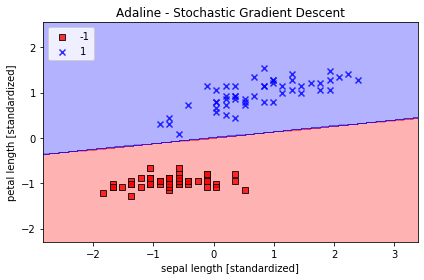

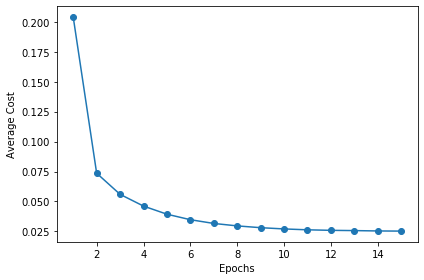

In [24]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - stochastyczny spadek wzdłuż gradientu')
plt.xlabel('Długość działki [standaryzowana]')
plt.ylabel('Długość płatka [standaryzowana]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('rysunki/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Średni koszt')

plt.tight_layout()
# plt.savefig('rysunki/02_15_2.png', dpi=300)
plt.show()

In [25]:
ada_sgd.partial_fit(X_std[0, :], y[0])

# Podsumowanie

...

--- 

Czytelnicy mogą zignorować poniższą komórkę.

In [26]:
! python ../.convert_notebook_to_script.py --input r02.ipynb --output r02.py

[NbConvertApp] Converting notebook ch02.ipynb to script
[NbConvertApp] Writing 16677 bytes to ch02.py
